In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [32]:
import math

In [5]:
df = pd.read_csv("Strength_score_vs_win_new.txt")

In [6]:
df

,strength_score,win_rate
0,2.384710,0.56612
1,2.538540,0.61424
2,0.620816,0.01672
3,1.007760,0.29192
4,3.624700,0.81724
...,...,...
19995,1.623110,0.40412
19996,1.853880,0.48728
19997,0.852362,0.10932
19998,0.929285,0.10520


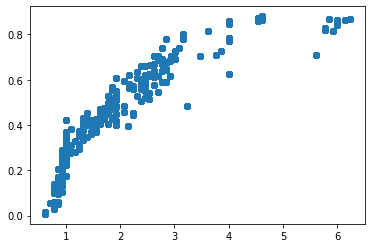

In [7]:
plt.scatter(df.strength_score, df.win_rate)

In [8]:
np.asarray(df.strength_score).max()

6.23082

In [22]:
avg_win_rates = []
for i in range(70):
    df_temp = df[df.strength_score >=(i*0.1)]
    df_temp = df_temp[df_temp.strength_score <((i+1) * 0.1)]
    avg_win_rates.append(np.asarray(df_temp.strength_score).mean())

C:\Users\jeeva\AppData\Local\Temp\ipykernel_26636\3157430040.py:5: RuntimeWarning: Mean of empty slice.
  avg_win_rates.append(np.asarray(df_temp.strength_score).mean())


<BarContainer object of 70 artists>

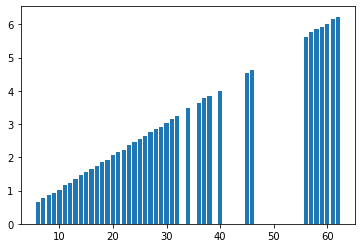

In [24]:
plt.bar(range(70), avg_win_rates)

In [11]:
avg_win_rates = []
for i in range(40):
    df_temp = df[df.strength_score >=(i*0.1)]
    df_temp = df_temp[df_temp.strength_score <((i+1) * 0.1)]
    avg_win_rates.append(np.asarray(df_temp.strength_score).mean())
    

C:\Users\jeeva\AppData\Local\Temp\ipykernel_26636\1153664904.py:5: RuntimeWarning: Mean of empty slice.
  avg_win_rates.append(np.asarray(df_temp.strength_score).mean())


<BarContainer object of 40 artists>

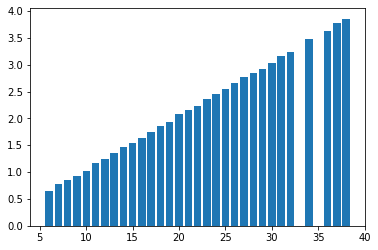

In [12]:
plt.bar(range(40), avg_win_rates)

In [16]:
df_under_4 = df[df.strength_score <=4]

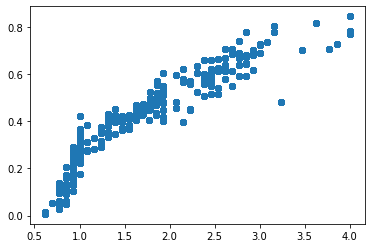

In [17]:
plt.scatter(df_under_4.strength_score, df_under_4.win_rate)

In [18]:
df_under_2 = df[df.strength_score <=2]

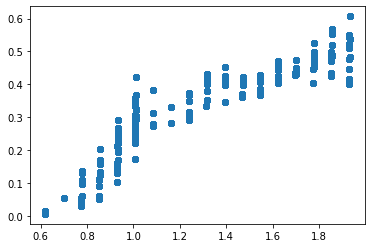

In [19]:
plt.scatter(df_under_2.strength_score, df_under_2.win_rate)

In [20]:
avg_win_rates = []
for i in range(20):
    df_temp = df[df.strength_score >=(i*0.1)]
    df_temp = df_temp[df_temp.strength_score <((i+1) * 0.1)]
    avg_win_rates.append(np.asarray(df_temp.strength_score).mean())

C:\Users\jeeva\AppData\Local\Temp\ipykernel_26636\943877404.py:5: RuntimeWarning: Mean of empty slice.
  avg_win_rates.append(np.asarray(df_temp.strength_score).mean())


<BarContainer object of 20 artists>

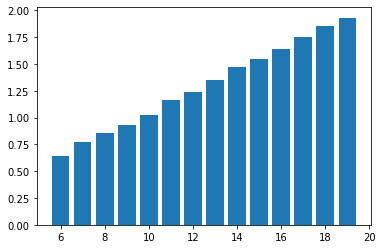

In [21]:
plt.bar(range(20), avg_win_rates)

In [26]:
strength_vals = np.asarray(df.strength_score).reshape(-1,1)

In [30]:
strength_vals

array([[2.38471 ],
       [2.53854 ],
       [0.620816],
       ...,
       [0.852362],
       [0.929285],
       [3.85545 ]])

In [36]:
log_strength = np.log(strength_vals)#np.log is the natural log

In [37]:
log_strength

array([[ 0.86907752],
       [ 0.93158911],
       [-0.47672054],
       ...,
       [-0.15974396],
       [-0.07333981],
       [ 1.34948773]])

In [40]:
df_log = df
df_log['log_strength'] = log_strength

In [41]:
df_log

,strength_score,win_rate,log_strength
0,2.384710,0.56612,0.869078
1,2.538540,0.61424,0.931589
2,0.620816,0.01672,-0.476721
3,1.007760,0.29192,0.007730
4,3.624700,0.81724,1.287772
...,...,...,...
19995,1.623110,0.40412,0.484344
19996,1.853880,0.48728,0.617281
19997,0.852362,0.10932,-0.159744
19998,0.929285,0.10520,-0.073340


In [42]:
df_log_train = df_log.drop(['win_rate'], axis = 1)

In [49]:
df_log_train

,strength_score,log_strength
0,2.384710,0.869078
1,2.538540,0.931589
2,0.620816,-0.476721
3,1.007760,0.007730
4,3.624700,1.287772
...,...,...
19995,1.623110,0.484344
19996,1.853880,0.617281
19997,0.852362,-0.159744
19998,0.929285,-0.073340


In [43]:
X_train, X_test, y_train, y_test = tts(df_log_train, df.win_rate, test_size = 0.2)

In [44]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [45]:
LR.score(X_test, y_test)

0.9310995734761122

In [46]:
LR.coef_#coef values to convert any strength score into a corresponding win rate with fairly good accuracy

array([-0.05574417,  0.50187506])

In [48]:
LR.intercept_

0.29152419686993136